<a href="https://colab.research.google.com/github/saranpathivada/Stock-price-prediction/blob/main/Stock-price-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Description:
Time Series Forecasting Using Neural Networks
Project Title: Time Series Forecasting with Deep Learning Models

##Objective:
The primary objective of this project is to develop and compare different deep learning models, including LSTM, GRU, and CNN, to forecast future values in a time series dataset. The goal is to minimize the Root Mean Square Error (RMSE) and identify the most effective model architecture for accurate predictions.

Import required libraries.

In [142]:
#import the libraries
import math
import yfinance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,GRU,Dropout,Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Get the stock price data.


In [143]:
#get the stock quote
import yfinance as yf
df = yf.download('AAPL', start='2017-01-01', end='2024-08-10')
#show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.921545,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.891413,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.028166,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.329481,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.579809,134247600
...,...,...,...,...,...,...
2024-08-05,199.089996,213.500000,196.000000,209.270004,209.028061,119548600
2024-08-06,205.300003,209.990005,201.070007,207.229996,206.990402,69660500
2024-08-07,206.899994,213.639999,206.389999,209.820007,209.577423,63516400


In [144]:
df.shape

(1913, 6)

Plot the close price

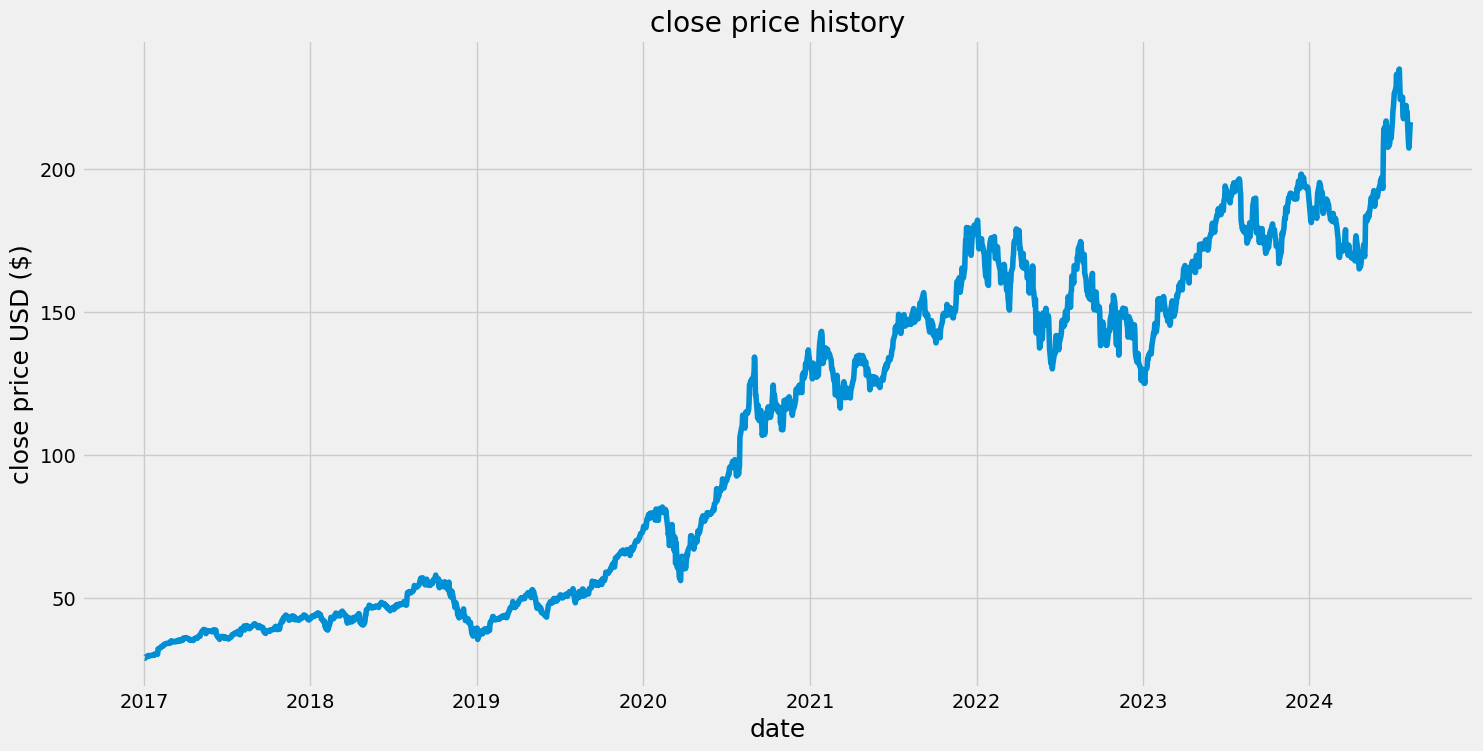

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('close price USD ($)',fontsize=18)
plt.show()

In [146]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1531

Data normalization

In [147]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[1.57914726e-04],
       [0.00000000e+00],
       [7.16667813e-04],
       ...,
       [8.78531696e-01],
       [8.95488624e-01],
       [9.09724747e-01]])

Train Data


In [148]:

#create training dataset
train_data=scaled_data[0:training_data_len,:]
#split data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00015791, 0.        , 0.00071667, 0.00229576, 0.00360761,
       0.00375338, 0.00453077, 0.00392343, 0.00366835, 0.00483444,
       0.00482229, 0.00456721, 0.00483444, 0.00493162, 0.004798  ,
       0.00711804, 0.00719093, 0.00720307, 0.00681437, 0.00647426,
       0.01546292, 0.01519569, 0.01586377, 0.01733352, 0.01883974,
       0.01945922, 0.0199208 , 0.0195564 , 0.02097757, 0.02307899,
       0.02367417, 0.02347983, 0.02392926, 0.02511965, 0.02561767,
       0.02491315, 0.02507107, 0.02539902, 0.02547191, 0.02887301,
       0.02786484, 0.02886087, 0.02832641, 0.02854506, 0.02791342,
       0.02752471, 0.02808348, 0.02815635, 0.02790128, 0.02968687,
       0.02996624, 0.02911596, 0.03090155, 0.02893375, 0.03085295,
       0.03024561, 0.0299055 , 0.03019703, 0.0337439 , 0.03413259])]
[0.033901798855394405]

[array([0.00015791, 0.        , 0.00071667, 0.00229576, 0.00360761,
       0.00375338, 0.00453077, 0.00392343, 0.00366835, 0.00483444,
       0.00482229, 0.00456721, 0.0

In [150]:
#convert x_train and y_train into numphy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [151]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1471, 60, 1)

### LSTM

In [152]:
#build the LSTM model1
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model1.add(LSTM(50,return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [153]:
#compile the model
model1.compile(optimizer='adam',loss='mean_squared_error')

In [154]:
#train the model
model1.fit(x_train,y_train,batch_size=1,epochs=1)

1471/1471 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - loss: 0.0042


In [155]:
#create testing data set
test_data=scaled_data[training_data_len-60:,:]
#create data set x_test, y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [156]:
#convert data into numphy array
x_test=np.array(x_test)

In [157]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [158]:
#get the models predicted price values
predictions=model1.predict(x_test)
predictions=scaler.inverse_transform(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


RMSE


In [159]:
#getthe root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse


5.497416511256033

Preditions vs actual values

<ipython-input-160-aff68c0e291e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


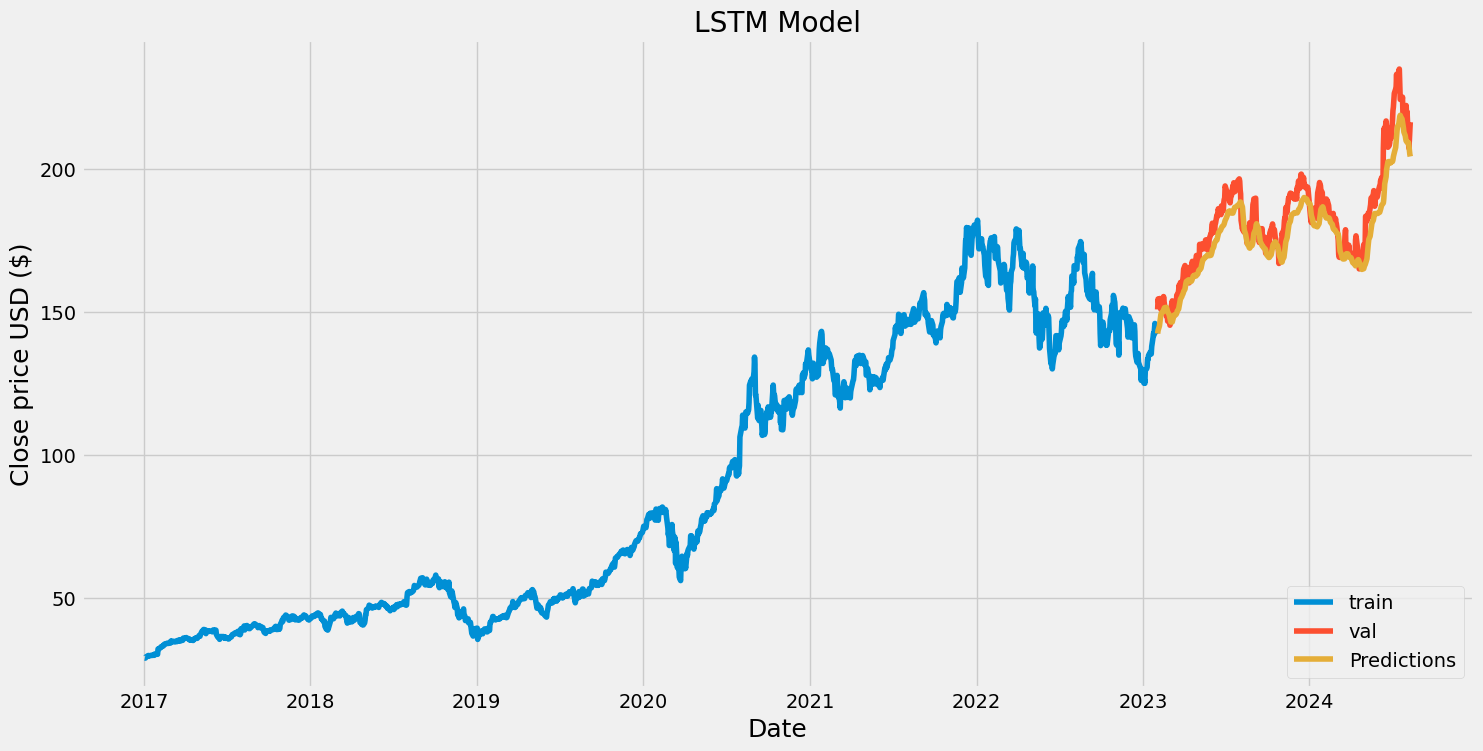

In [160]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','val','Predictions'],loc='lower right')
plt.show()

### GRU

In [161]:
#build the GRU model2
model2 = Sequential()
model2.add(GRU(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model2.add(GRU(50, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [162]:
#compile the model
model2.compile(optimizer='adam',loss='mean_squared_error')

In [163]:
#train the model
model2.fit(x_train,y_train,batch_size=1,epochs=1)

1471/1471 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - loss: 0.0053


In [164]:
#create testing data set
test_data=scaled_data[training_data_len-60:,:]
#create data set x_test, y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [165]:
#convert data into numphy array
x_test=np.array(x_test)

In [166]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [167]:
#get the models predicted price values
predictions=model2.predict(x_test)
predictions=scaler.inverse_transform(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


RMSE

In [168]:
#getthe root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.8500958188041967

Predictions vs actual values.


<ipython-input-169-f2688a32c34f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


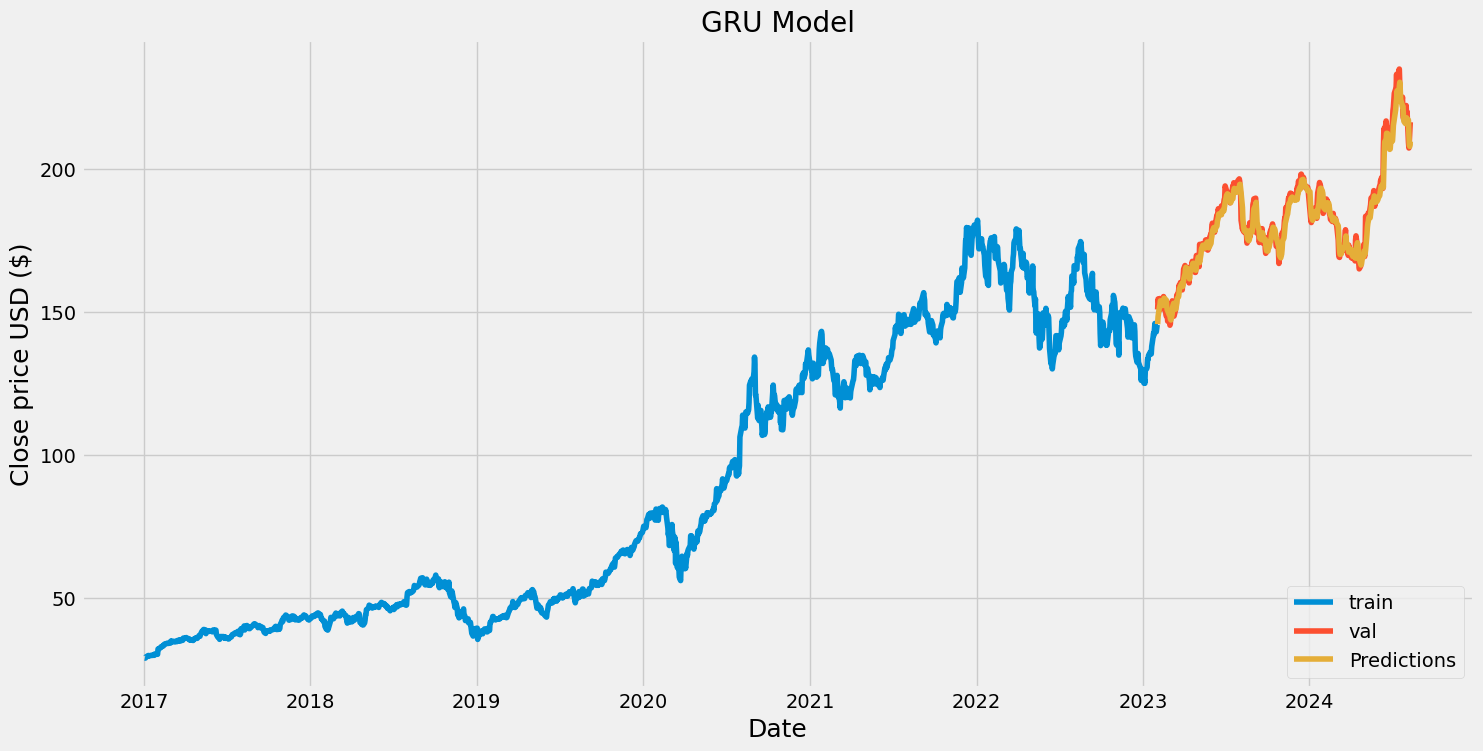

In [169]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('GRU Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','val','Predictions'],loc='lower right')
plt.show()

### Hybrid model (LSTM+GRU)

In [170]:
# GRU + LSTM
model3 = Sequential()
model3.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model3.add(Dropout(0.2))
model3.add(GRU(50, return_sequences=False))
model3.add(Dropout(0.2))
model3.add(Dense(25))
model3.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [171]:
#compile the model
model3.compile(optimizer='adam',loss='mean_squared_error')

In [172]:
#train the model
model3.fit(x_train,y_train,batch_size=1,epochs=1)

1471/1471 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - loss: 0.0042


In [173]:
#create testing data set
test_data=scaled_data[training_data_len-60:,:]
#create data set x_test, y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [175]:
#convert data into numphy array
x_test=np.array(x_test)

In [176]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [177]:
#get the models predicted price values
predictions=model3.predict(x_test)
predictions=scaler.inverse_transform(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


RMSE


In [178]:
#getthe root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse



13.994205255158908

Predictions vs actual values

<ipython-input-179-2651899b48b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


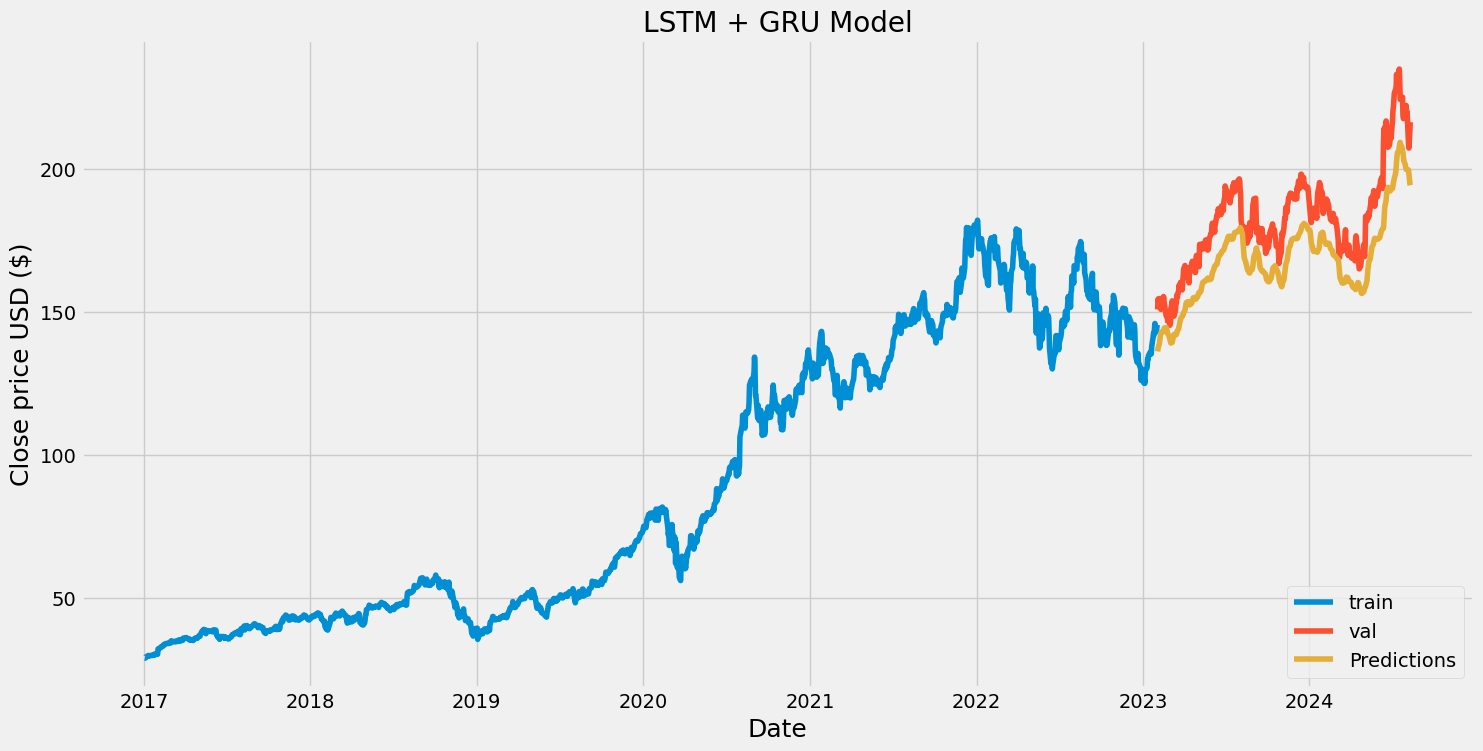

In [179]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM + GRU Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','val','Predictions'],loc='lower right')
plt.show()

### CNN

In [180]:
#CNN
model4 = Sequential()
model4.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(50, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [181]:
#compile the model
model4.compile(optimizer='adam',loss='mean_squared_error')

In [182]:
#train the model
model4.fit(x_train,y_train,batch_size=1,epochs=1)

1471/1471 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0082


In [183]:
#create testing data set
test_data=scaled_data[training_data_len-60:,:]
#create data set x_test, y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [184]:
#convert data into numphy array
x_test=np.array(x_test)

In [185]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [186]:
#get the models predicted price values
predictions=model4.predict(x_test)
predictions=scaler.inverse_transform(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


RMSE


In [187]:
#getthe root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.8837960527829476

Predictions vs actual values


<ipython-input-188-7f8a6e6231be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


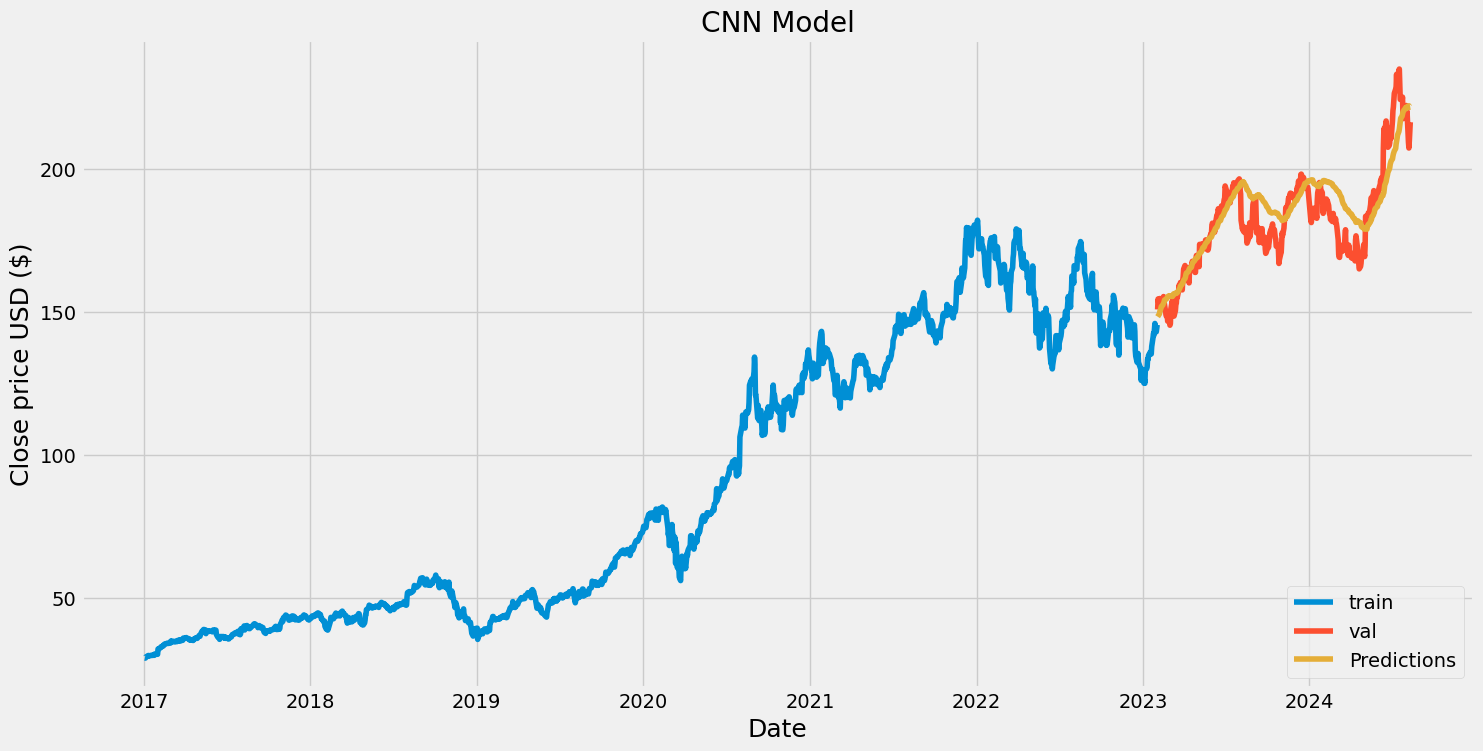

In [188]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('CNN Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','val','Predictions'],loc='lower right')
plt.show()

In [189]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-02-02,150.820007,148.296844
2023-02-03,154.500000,148.555420
2023-02-06,151.729996,149.285187
2023-02-07,154.649994,150.171066
2023-02-08,151.919998,150.681183
...,...,...
2024-08-05,209.270004,221.924240
2024-08-06,207.229996,221.974579
2024-08-07,209.820007,221.531876


### Inference

In [190]:
#inference
#Get the quote
apple_quote = yf.download('AAPL', start='2017-01-01', end='2024-08-10')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model2.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[211.89723]]


In [191]:
import yfinance as yf
apple_quote2 = yf.download('AAPL', start='2024-08-08', end='2024-08-09')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2024-08-08    213.309998
Name: Close, dtype: float64
